In [1]:
import ROOT
from PIL import Image
import os


sh: cmsrel: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsrel'
sh: cmsenv: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsenv'
sh: cmsrel: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsrel'
sh: cmsenv: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsenv'
sh: cmsrel: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsrel'
sh: cmsenv: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsenv'


Welcome to JupyROOT 6.30/04


sh: cmsrel: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsrel'
sh: cmsenv: line 1: syntax error: unexpected end of file
sh: error importing function definition for `BASH_FUNC_cmsenv'


In [44]:
# create some fake data with arrors which are almost quadratic
data = ROOT.TGraphErrors()
for i in range(100):
    data.SetPoint(i, i, i**2+ROOT.gRandom.Gaus(0, 0.1*i))
    data.SetPointError(i, 0.1, 0.1+ROOT.gRandom.Gaus(0, 0.01))



# create a linear fit
fit = ROOT.TF1("fit", "[0] + [1]*x + [2]*x*x", 0, 100)
# fit.SetParameters(0,
data.Fit(fit, "S M")
data.SetMarkerStyle(20)
data.SetMarkerColor(ROOT.kBlue)
data.SetMarkerSize(0.5)


 FCN=24.7298 FROM HESSE     STATUS=OK             18 CALLS         419 TOTAL
                     EDM=2.56034e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.24364e-02   8.99990e-02   4.25083e-05   1.90221e-05
   2  p1           3.69806e-02   4.28425e-02   9.98395e-06   7.36959e-05
   3  p2           9.99406e-01   7.27434e-04   2.38277e-07   1.85200e-03


In [45]:
# create a canvas

canvas = ROOT.TCanvas("canvas", "canvas", 800, 600)
data.Draw("AP")
fit.Draw("SAME")
canvas.Update()

canvas.Draw()

canvas.SaveAs("fit.png")

# open the image and display it
img = Image.open("fit.png")
img.show()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file fit.png has been created
/bin/sh: cmsrel: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_cmsrel'
/bin/sh: cmsenv: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_cmsenv'


In [46]:
# delete the canvas
del canvas
#delete the image
# os.remove("fit.png")

In [160]:
num=3
data_dict= {
        "x": [
            19.742595700849193,
            20.961956745031323,
            22.913917200389978,
            25.795906719734983,
            28.933211203398052,
            32.36100163359883,
            37.11644008430428,
            42.12721665941205,
            50.0610979017745,
            63.544909963222864,
            80.03059393317044,
            103.50315376511452,
            134.07165011121114,
            173.39790982475063,
            246.71699770493206,
            348.76918976752427,
            472.2461821821838,
            648.3805068553121,
            873.1081991338834,
            1246.8664506319942,
            1755.0752251305134,
            2259.607635227575,
            2759.666541188723,
            3255.8125887052033,
            3754.9390144300955,
            4247.931077027038,
            4744.936271881235
        ][num:],
        "y": [
            0.8784867120579838,
            0.9290940766550523,
            0.965889881671094,
            0.9888133498145859,
            0.995210251306295,
            1.0031978931527465,
            1.005214878110078,
            1.0031978931527465,
            1.0062264150943396,
            1.0031978931527465,
            1.001188986232791,
            1.0001875468867216,
            0.9976926914442505,
            0.9962017434620175,
            0.9937267080745342,
            0.9922475812453486,
            0.9927401340282949,
            0.9932331760615845,
            0.9947152449639393,
            0.9947152449639393,
            0.9942207307979121,
            0.9942207307979121,
            0.995210251306295,
            0.9971952131637997,
            0.9981906663339157,
            0.9996875781054737,
            1.001188986232791
        ][num:],
        "yerr": [
            0.007857033121122764,
            0.0057487801174682185,
            0.005771071603023795,
            0.005384420450208974,
            0.0061819218461061165,
            0.004875736556316148,
            0.005260983384065786,
            0.00571030272869574,
            0.003536225450950924,
            0.0034300785515880127,
            0.003249537366717525,
            0.0026407389065915407,
            0.0027381353080195257,
            0.002362599309259479,
            0.0016876573300585369,
            0.0019643277324079486,
            0.0015973175685779265,
            0.0014746913672239329,
            0.0013873507601356821,
            0.0009379872771965403,
            0.0008990658580254199,
            0.0008547523081583372,
            0.0008281173763365149,
            0.0008557225041647039,
            0.0008026345908174516,
            0.0007839775263209061,
            0.000711616316067105
        ][num:],}

In [161]:
# create a graph from the dictionary
graph = ROOT.TGraphErrors(len(data_dict["x"]))
for i in range(len(data_dict["x"])):
    graph.SetPoint(i, data_dict["x"][i], data_dict["y"][i])
    graph.SetPointError(i, 0, data_dict["yerr"][i]/1)


In [168]:
func_string = "[0] + [1] / (TMath::Log10(x) * TMath::Log10(x) + [2]) + [3] * TMath::Exp(-[4] * (TMath::Log10(x) - [5]) * (TMath::Log10(x) - [5])) + [6] * TMath::Exp(-[7] * (TMath::Log10(x) - [8]) * (TMath::Log10(x) - [8]))"
func_root = ROOT.TF1("func_root", func_string, data_dict["x"][0], data_dict["x"][-1])
func_root.SetParameters(
            1.6081836786569568,
            22.58516985573203,
            35.96303104113097,
            -1.2096680332552872,
            0.012402902153327011,
            0.46972065651573747,
            -4.876292773828425,
            23.88044583275305,
            0.9067093288482084
)
fit_info = str(graph.Fit("func_root", "S N E"))

****************************************
         Invalid FitResult  (status = 4 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      12.1855
NDf                       =           15
Edm                       =  0.000615816
NCalls                    =         3007
p0                        =      1.64417   +/-   0.101871    
p1                        =      20.4476   +/-   4.05104     
p2                        =      27.6486   +/-   7.94521     
p3                        =     -1.36038   +/-   0.192429    
p4                        =    0.0128742   +/-   0.0020418   
p5                        =   -0.0239946   +/-   0.865504    
p6                        =   -0.0207141   +/-   0.0066602   
p7                        =      129.312   +/-   135.605     
p8                        =      1.40199   +/-   0.0543707   


Warning in <Fit>: Abnormal termination of minimization.


In [169]:
#draw the graph
canvas = ROOT.TCanvas("canvas", "canvas", 800, 600)
graph.SetMarkerStyle(20)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetMarkerSize(0.5)
graph.SetTitle("Graph with fit")
graph.GetXaxis().SetTitle("x")
graph.GetYaxis().SetTitle("y")
# set log x
ROOT.gPad.SetLogx()
graph.Draw("AP")
func_root.Draw("SAME")
canvas.Update()
canvas.Draw()
canvas.SaveAs("fit.png")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file fit.png has been created


In [4]:
func_string2 = "[2]*([3]*([4]+TMath::Log(max([0],min([1],x)))*([5]+TMath::Log(max([0],min([1],x)))*[6])+[7]/x))*1./([8]+[9]/x+[10]*log(x)/x+[11]*(pow(x/[12],[13])-1)/(pow(x/[12],[13])+1)+[14]*pow(x,-0.3051)+[15]*x)"
func2 = ROOT.TF1("func2", func_string2, 10, 4500)
# func2.SetParameters(
#     [30,
#     70,
#     0.995827,
#     1.000000,
#     0.430200,
#     0.314141,
#     -0.000254,
#     -4.185680,
#     1.0170,
#     1.3459,
#     0.25291,
#     0.05041,
#     196.01,
#     0.9754,
#     -0.07417,
#     -0.00003170,]
# )

func2.SetParameter(0, 30)
func2.SetParameter(1, 70)
func2.SetParameter(2, 0.995827)
func2.SetParameter(3, 1.000000)
func2.SetParameter(4, 0.430200)
func2.SetParameter(5, 0.314141)
func2.SetParameter(6, -0.000254)
func2.SetParameter(7, -4.185680)
func2.SetParameter(8, 1.0170)
func2.SetParameter(9, 1.3459)
func2.SetParameter(10, 0.25291)
func2.SetParameter(11, 0.05041)
func2.SetParameter(12, 196.01)
func2.SetParameter(13, 0.9754)
func2.SetParameter(14, -0.07417)
func2.SetParameter(15, -0.00003170)


TypeError: double TF1::Eval(double x, double y = 0, double z = 0, double t = 0) =>
    TypeError: could not convert argument 1 (only size-1 arrays can be converted to Python scalars)

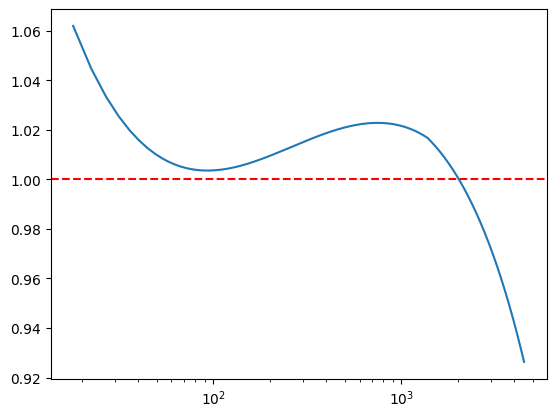

In [9]:
def func2_py(x, p):
    return 1/(
        p[2]
        * (
            p[3]
            * (
                p[4]
                + np.log(np.minimum(p[1], x))
                * (p[5] + np.log(np.minimum(p[1], x)) * p[6])
                + p[7] / x
            )
        )
        * 1.0
        / (
            p[8]
            + p[9] / x
            + p[10] * np.log(x) / x
            + p[11] * (pow(x / p[12], p[13]) - 1) / (pow(x / p[12], p[13]) + 1)
            + p[14] * pow(x, -0.3051)
            + p[15] * x
        )
    )


params = [
30  , 1380   ,0.995827, 1.000000, 0.951355, 0.021658, -0.002214, 0.117335,   1.0170, 1.3459, 0.25291, 0.05041, 196.01, 0.9754, -0.07417, -0.00003170]

# draw the function in a matplotlib plot
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(18, 4500, 1000)

plt.plot(x, func2_py(x, params), label="function")
# x log scale
plt.xscale("log")
#plot line at 1
plt.axhline(y=1, color='r', linestyle='--')
plt.show()